In [1]:
!pip install opendatasets

In [26]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [15]:
data = pd.read_csv("/content/Car_Purchasing_Data.csv")

In [16]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [17]:
data.drop("Customer Name",axis=1,inplace=True)
data.drop("Customer e-mail",axis=1,inplace=True)
data.drop("Country",axis=1,inplace=True)
data.drop("Gender",axis=1,inplace=True)
data.drop("Age",axis=1,inplace=True)
data.drop("Credit Card Debt",axis=1,inplace=True)
data.drop("Net Worth",axis=1,inplace=True)

In [18]:
data.head()

,Annual Salary,Car Purchase Amount
0,62812.09301,35321.45877
1,66646.89292,45115.52566
2,53798.55112,42925.70921
3,79370.03798,67422.36313
4,59729.15130,55915.46248


In [19]:
X = data["Annual Salary"]
Y = data["Car Purchase Amount"]

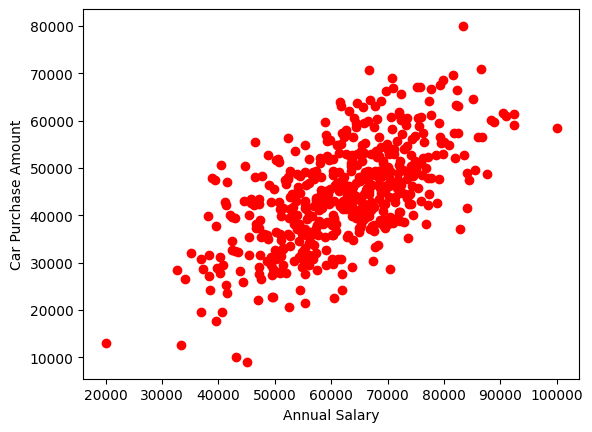

In [23]:
plt.scatter(X,Y,color="red")
plt.xlabel("Annual Salary")
plt.ylabel("Car Purchase Amount")
plt.show()

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model. compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01) ,loss=tf.keras.losses.mae , metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=1),Y_train,epochs=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7831.4785 - mae: 7831.4785  
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6774.3296 - mae: 6774.3296 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7021.6162 - mae: 7021.6162 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7053.4629 - mae: 7053.4629 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6742.4429 - mae: 6742.4429 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6883.3008 - mae: 6883.3008 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6881.9048 - mae: 6881.9048 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6858.7988 - mae: 6858.7988 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6640.4419 - mae: 6640.4419 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7110.2441 - mae: 7110.2441 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6450.3311 - mae: 6450.3311 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 

In [40]:
Y_predict = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


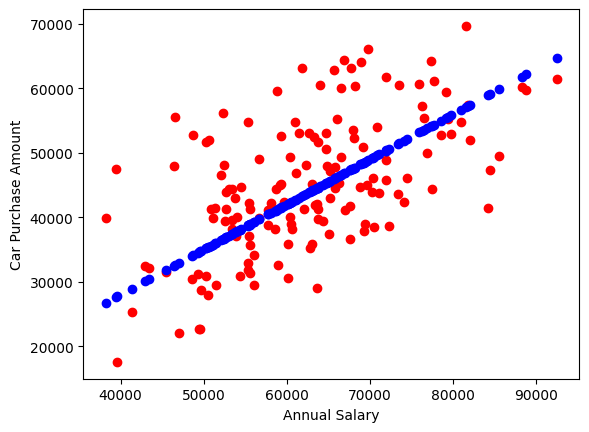

In [41]:
plt.scatter(X_test,Y_test,color="red")
plt.scatter(X_test,Y_predict,color="blue")
plt.xlabel("Annual Salary")
plt.ylabel("Car Purchase Amount")
plt.show()